## **PCA**

In [86]:
import pandas as pd
import seaborn as sns

In [87]:
df = sns.load_dataset('iris')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [89]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal_length,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal_width,150.0,NaN,NaN,NaN,3.057333,0.435866,2.0,2.8,3.0,3.3,4.4
petal_length,150.0,NaN,NaN,NaN,3.758,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,NaN,NaN,NaN,1.199333,0.762238,0.1,0.3,1.3,1.8,2.5
species,150,3,setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [91]:
df.duplicated().sum()

np.int64(1)

In [92]:
df1 = df.drop_duplicates()

In [93]:
df1.duplicated().sum()

np.int64(0)

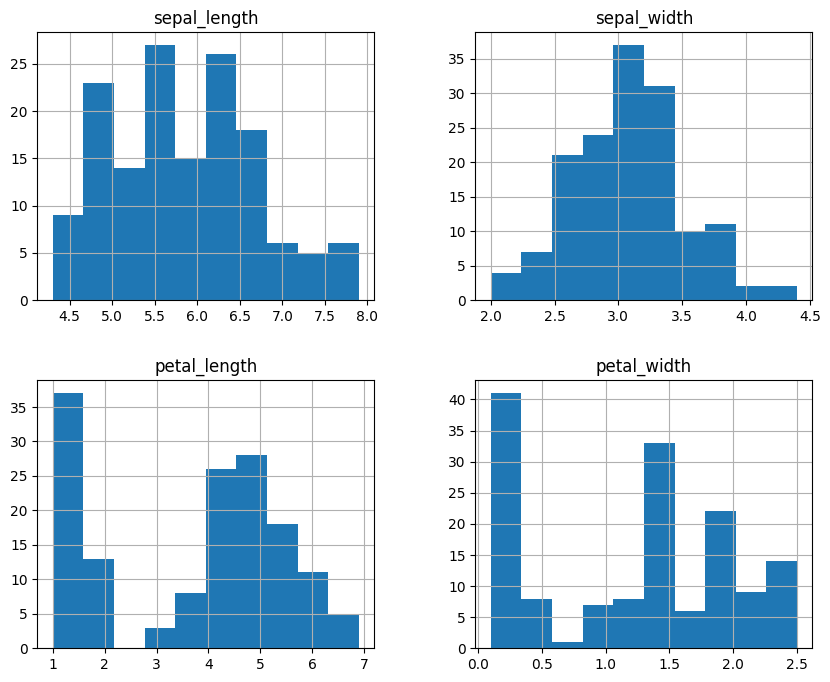

In [94]:
import matplotlib.pyplot as plt
df1.hist(figsize=(10,8))
plt.show()

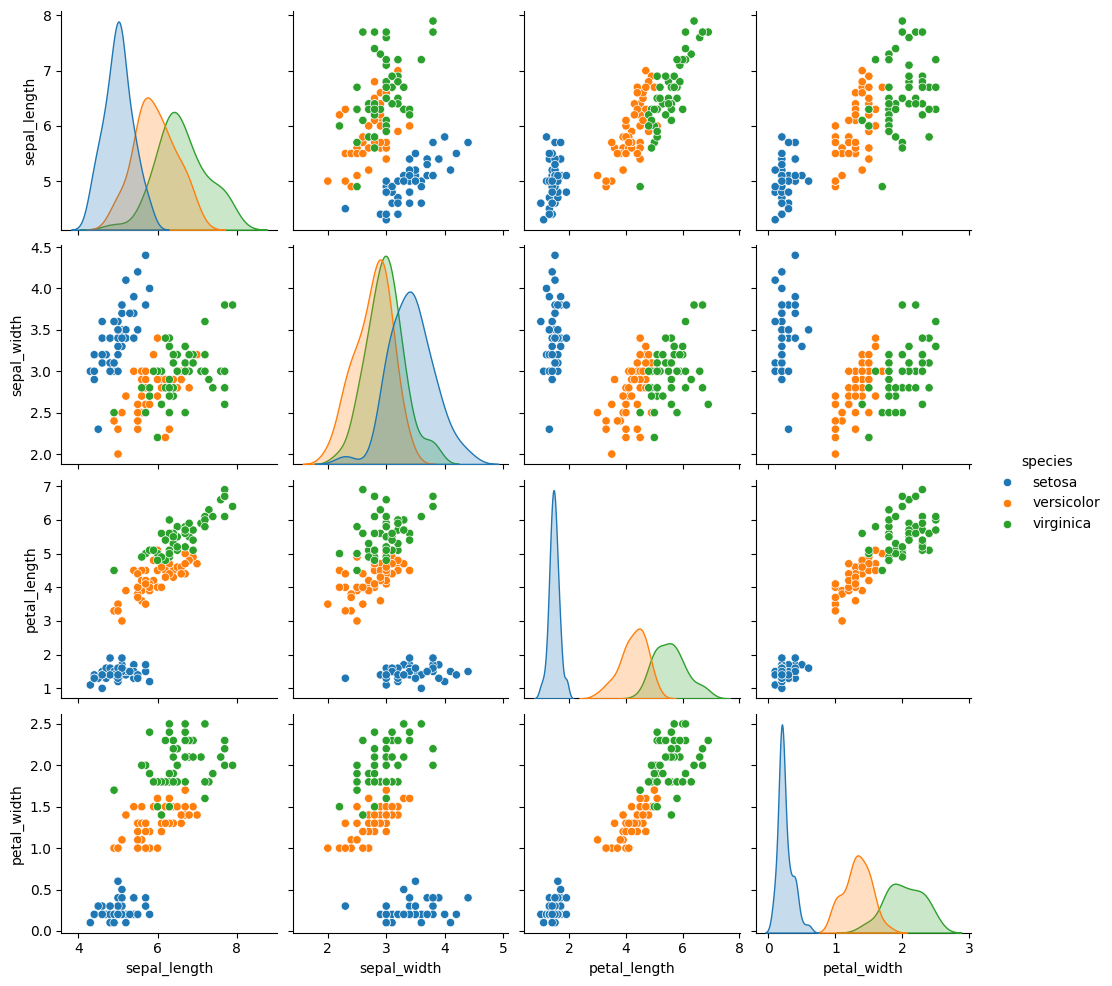

In [95]:
sns.pairplot(data=df1, hue='species')
plt.show()

In [96]:
num = df1.select_dtypes(include=[int, float]).columns

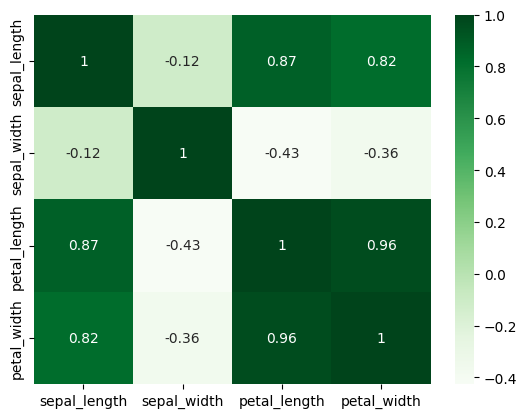

In [97]:
sns.heatmap(df1[num].corr(), annot=True, cmap='Greens')
plt.show()

In [98]:
x  = df1.drop('species', axis=1)
y = df1['species']

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = make_pipeline(
    StandardScaler(),
    PCA(n_components=2)
)

In [100]:
pca

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2))])

In [101]:
pca_data = pca.fit_transform(x)
pca_data[0]

array([-2.25269158,  0.47929942])

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size=0.2, random_state=42)

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
random_model = RandomForestClassifier(n_estimators=1000)
random_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [105]:
y_pred = random_model.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [106]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Accurcy : {accuracy_score(y_test, y_pred)}")
print(f"Classification Report :\n {classification_report(y_test, y_pred)}")

Accurcy : 0.9333333333333333
Classification Report :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.89      0.89         9
   virginica       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [107]:
X_train[0]

array([-2.76123087,  0.4610207 ])

In [108]:
new_data = [[3, 4]]
prediction = random_model.predict(new_data)
prediction[0]

'virginica'

### **Breast Cancer wisconsin Dataset**

In [109]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()



In [110]:
df2 = pd.DataFrame(data.data, columns=data.feature_names)
df2['Target'] = data.target

In [111]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [112]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [113]:
df2.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

In [114]:
df2.duplicated().sum()

np.int64(0)

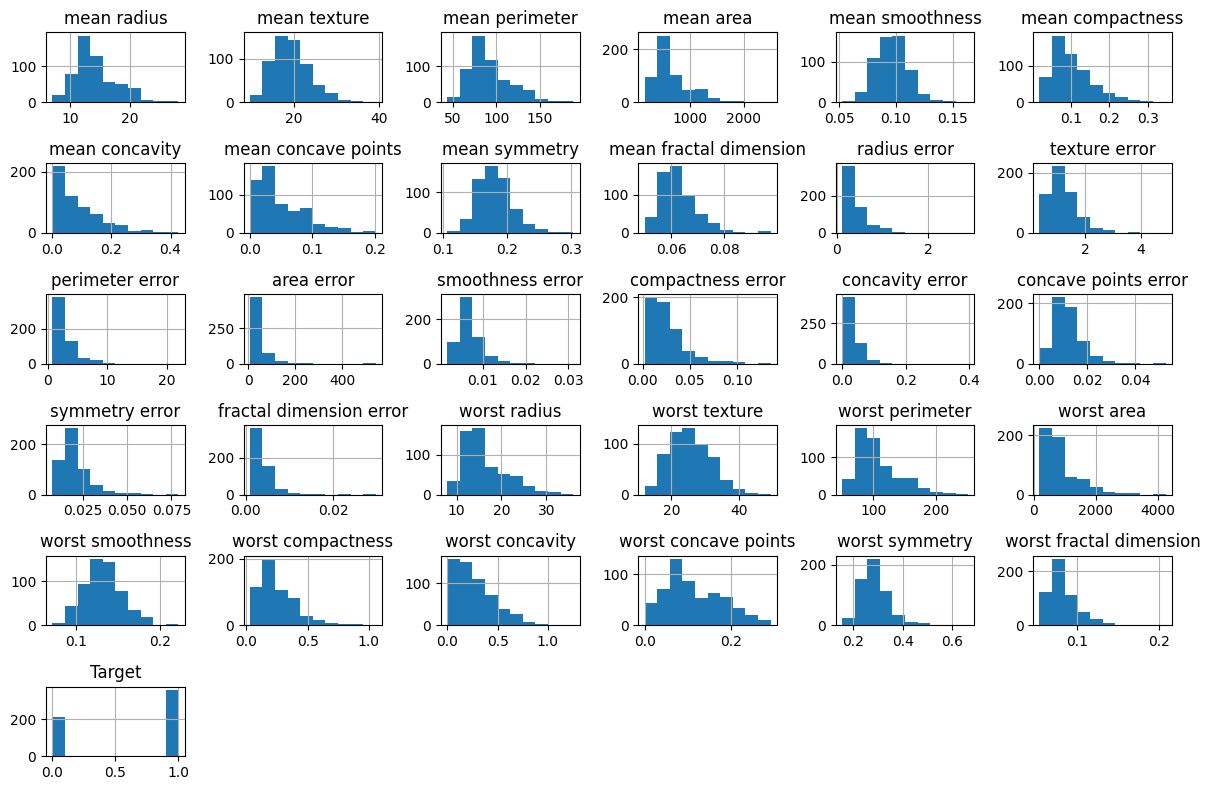

In [115]:
df2.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

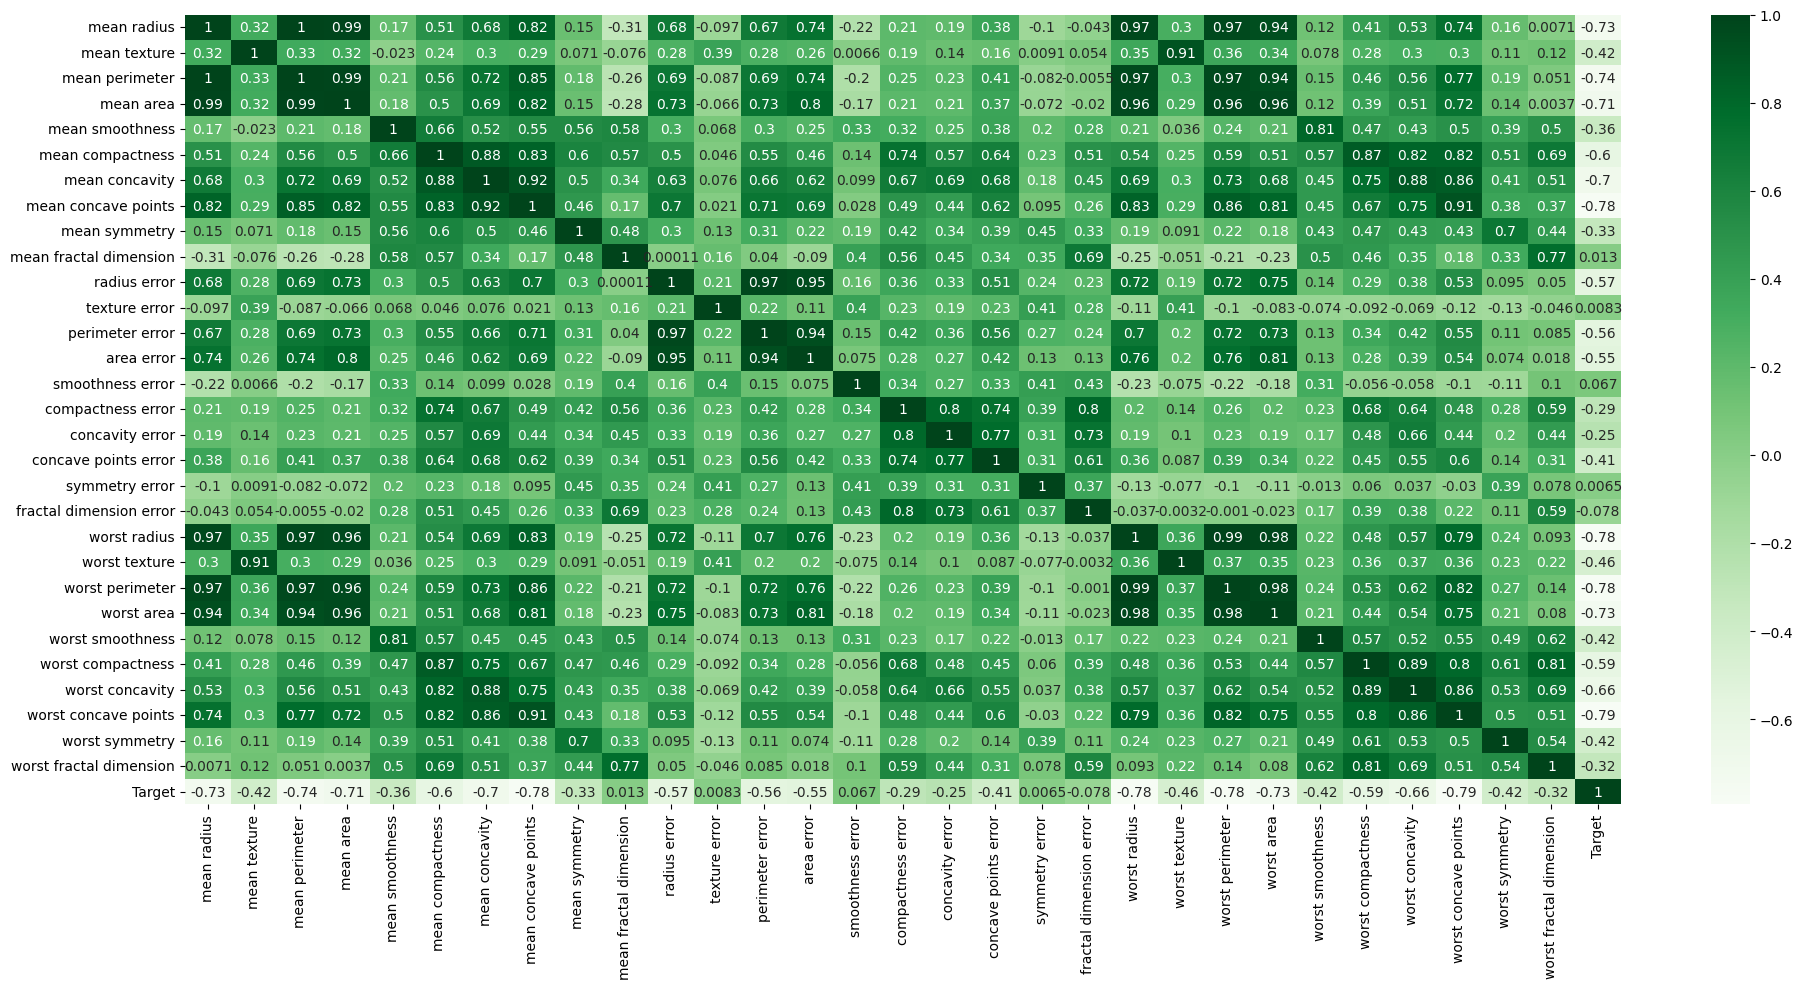

In [116]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(), annot=True, cmap='Greens')
plt.tight_layout()
plt.show()

In [117]:
x = df2.drop('Target', axis=1)
y = df2['Target']

In [119]:
pca_data1 = pca.fit_transform(x)
pca_data1[0]

array([9.19283683, 1.94858307])

In [120]:
X_train, X_test, y_train, y_test = train_test_split(pca_data1, y, test_size=0.2, random_state=42)

In [121]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=1000)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [122]:
y_pred = xgb_model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [123]:
print(f"Accurcy : {accuracy_score(y_test, y_pred)}")
print(f"Classification Report :\n {classification_report(y_test, y_pred)}")

Accurcy : 0.956140350877193
Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [124]:
X_train[0]

array([4.33000265, 9.20252569])

In [125]:
new_data = [[5, 10]]
prediction = xgb_model.predict(new_data)
prediction[0]

np.int64(0)